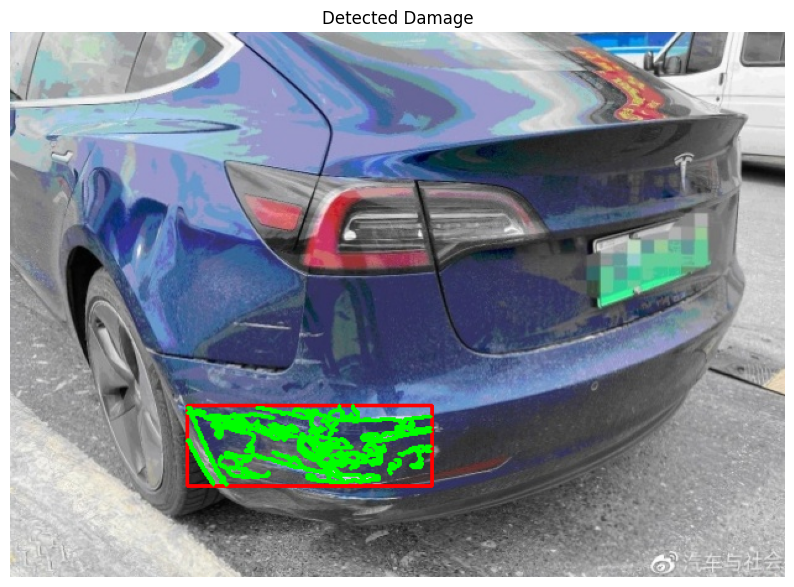

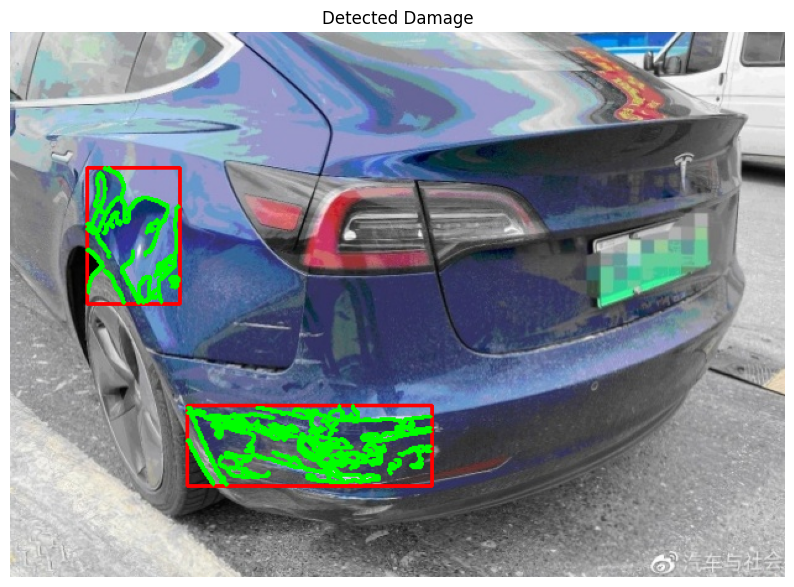

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图片
image = cv2.imread('car_undistorted.jpg')
height, width = image.shape[0], image.shape[1]

# 转换对应的坐标，之前是 1000*1000的坐标系
def get_x_y(x, y):
    return int(x/1000*width), int(y/1000*height)    

def find_damage(x1, y1, x2, y2):
    # 定义ROI区域的坐标
    x_start, y_start = get_x_y(x1, y1)
    x_end, y_end = get_x_y(x2, y2)
    
    # 提取ROI区域
    roi = image[y_start:y_end, x_start:x_end]
    # 转换为灰度图
    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    
    # 应用高斯模糊
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    # 使用Canny边缘检测
    edges = cv2.Canny(blurred, 0, 10)
    
    # 查找轮廓
    contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # 在原图上绘制ROI区域的红色边框
    cv2.rectangle(image, (x_start, y_start), (x_end, y_end), (0, 0, 255), 2)
    
    # 过滤并绘制轮廓（选择适当的轮廓）
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > 10:  # 这个值可以根据实际情况调整
            # 将轮廓转换到原图的绝对坐标
            contour += [x_start, y_start]
            cv2.drawContours(image, [contour], -1, (0, 255, 0), 2)
    
    # 使用Matplotlib在Jupyter中显示图像
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Detected Damage')
    plt.axis('off')  # 关闭坐标轴
    plt.show()
    
find_damage(229, 685, 544, 833)
find_damage(100, 250, 220, 500)

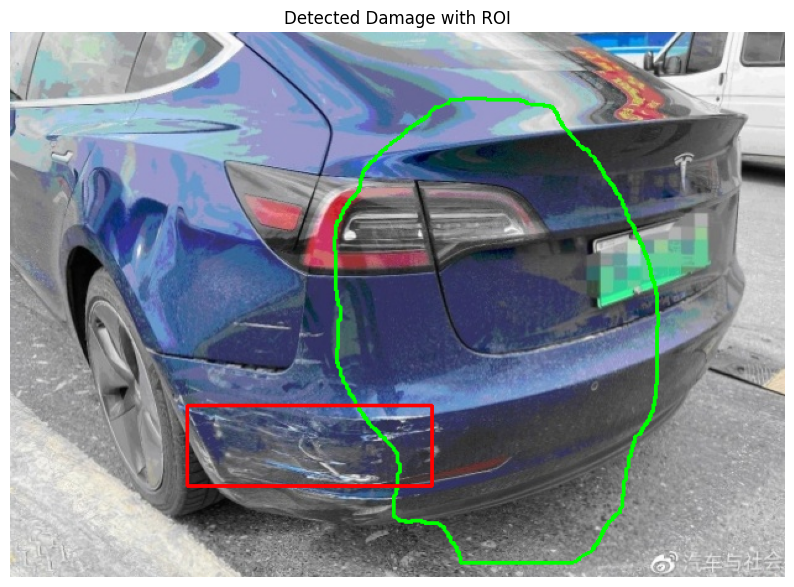

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图片
image = cv2.imread('car_undistorted.jpg')
height, width = image.shape[0], image.shape[1]

# 转换YOLOv8坐标系中的点到图像坐标系中的点
def convert_points(points, width, height):
    converted_points = []
    for point in points:
        x = int(point[0] / 1000000 * width)
        y = int(point[1] / 1000000 * height)
        converted_points.append((x, y))
    return converted_points

# YOLOv8 提取的车损区域
chesun_points = [
    [585728, 123904], [584704, 125952], [573440, 125952], [571392, 126976], [569344, 126976], [565248, 132096], [563200, 132096], [558080, 137216], [557056, 137216], [555008, 139264], [552960, 139264], [551936, 140288], [549888, 140288], [546816, 143360], [544768, 143360], [544768, 145408], [541696, 148480], [541696, 150528], [540672, 151552], [540672, 153600], [536576, 156672], [536576, 158720], [533504, 161792], [532480, 161792], [510976, 183296], [510976, 184320], [505856, 189440], [505856, 191488], [491520, 205824], [491520, 207872], [486400, 212992], [486400, 214016], [479232, 221184], [479232, 222208], [478208, 224256], [478208, 225280], [473088, 230400], [473088, 232448], [471040, 233472], [471040, 235520], [464896, 241664], [464896, 243712], [461824, 246784], [461824, 248832], [458752, 251904], [458752, 253952], [456704, 254976], [456704, 257024], [454656, 258048], [454656, 265216], [453632, 266240], [453632, 271360], [451584, 273408], [451584, 284672], [450560, 286720], [450560, 290816], [448512, 292864], [448512, 295936], [445440, 299008], [445440, 301056], [440320, 306176], [440320, 307200], [438272, 309248], [438272, 311296], [437248, 312320], [437248, 315392], [435200, 317440], [435200, 319488], [434176, 320512], [434176, 322560], [432128, 323584], [432128, 327680], [430080, 328704], [430080, 330752], [429056, 331776], [429056, 333824], [427008, 335872], [427008, 339968], [425984, 342016], [425984, 345088], [423936, 347136], [423936, 348160], [421888, 350208], [421888, 355328], [420864, 356352], [420864, 377856], [418816, 379904], [418816, 401408], [420864, 402432], [420864, 475136], [421888, 476160], [421888, 491520], [423936, 492544], [423936, 502784], [425984, 503808], [425984, 528384], [423936, 530432], [423936, 581632], [421888, 582656], [421888, 607232], [423936, 609280], [423936, 615424], [425984, 617472], [425984, 623616], [427008, 625664], [427008, 631808], [429056, 633856], [429056, 634880], [430080, 636928], [430080, 642048], [432128, 643072], [432128, 645120], [434176, 647168], [434176, 650240], [435200, 651264], [435200, 653312], [437248, 655360], [437248, 658432], [438272, 659456], [438272, 664576], [440320, 666624], [440320, 667648], [442368, 669696], [442368, 671744], [443392, 672768], [443392, 675840], [445440, 677888], [445440, 680960], [446464, 683008], [446464, 684032], [448512, 686080], [448512, 688128], [450560, 689152], [450560, 692224], [451584, 694272], [451584, 696320], [453632, 697344], [453632, 699392], [454656, 700416], [454656, 702464], [456704, 704512], [456704, 705536], [458752, 707584], [458752, 708608], [459776, 710656], [459776, 712704], [461824, 713728], [461824, 715776], [462848, 716800], [462848, 718848], [466944, 721920], [466944, 723968], [471040, 729088], [471040, 730112], [476160, 735232], [476160, 737280], [478208, 738304], [478208, 740352], [484352, 746496], [484352, 748544], [487424, 751616], [487424, 753664], [489472, 754688], [489472, 756736], [491520, 757760], [491520, 759808], [494592, 762880], [494592, 764928], [495616, 765952], [495616, 768000], [497664, 770048], [497664, 773120], [499712, 774144], [499712, 779264], [500736, 781312], [500736, 790528], [502784, 792576], [502784, 808960], [500736, 811008], [500736, 828416], [499712, 830464], [499712, 838656], [497664, 839680], [497664, 849920], [495616, 851968], [495616, 863232], [494592, 864256], [494592, 880640], [495616, 882688], [495616, 887808], [503808, 896000], [505856, 896000], [507904, 897024], [508928, 897024], [510976, 899072], [517120, 899072], [519168, 897024], [530432, 897024], [532480, 899072], [535552, 899072], [536576, 901120], [540672, 901120], [541696, 902144], [551936, 902144], [552960, 904192], [555008, 904192], [560128, 909312], [560128, 912384], [561152, 913408], [561152, 915456], [563200, 917504], [563200, 918528], [565248, 920576], [565248, 923648], [566272, 925696], [566272, 926720], [568320, 928768], [568320, 929792], [569344, 931840], [569344, 934912], [571392, 936960], [571392, 937984], [573440, 940032], [573440, 942080], [574464, 943104], [574464, 945152], [576512, 946176], [576512, 951296], [577536, 953344], [577536, 954368], [579584, 956416], [579584, 961536], [581632, 962560], [581632, 970752], [582656, 972800], [585728, 972800], [587776, 974848], [718848, 974848], [720896, 972800], [727040, 972800], [729088, 970752], [730112, 970752], [735232, 966656], [735232, 964608], [737280, 962560], [738304, 962560], [751616, 950272], [751616, 948224], [753664, 946176], [753664, 945152], [754688, 943104], [754688, 942080], [757760, 937984], [757760, 934912], [759808, 933888], [759808, 931840], [761856, 929792], [761856, 926720], [762880, 925696], [762880, 921600], [764928, 920576], [764928, 917504], [765952, 915456], [765952, 912384], [768000, 910336], [768000, 909312], [770048, 907264], [770048, 905216], [771072, 904192], [771072, 902144], [773120, 901120], [773120, 899072], [778240, 893952], [778240, 892928], [781312, 888832], [781312, 887808], [782336, 885760], [782336, 884736], [786432, 880640], [786432, 879616], [787456, 877568], [787456, 874496], [789504, 872448], [789504, 866304], [790528, 864256], [790528, 851968], [792576, 849920], [792576, 823296], [794624, 822272], [794624, 815104], [795648, 814080], [795648, 800768], [797696, 798720], [797696, 790528], [798720, 789504], [798720, 779264], [800768, 778240], [800768, 770048], [802816, 768000], [802816, 759808], [803840, 757760], [803840, 753664], [805888, 751616], [805888, 748544], [806912, 746496], [806912, 743424], [812032, 738304], [812032, 737280], [814080, 735232], [814080, 733184], [815104, 732160], [815104, 729088], [817152, 727040], [817152, 724992], [819200, 723968], [819200, 721920], [820224, 720896], [820224, 718848], [822272, 716800], [822272, 715776], [823296, 713728], [823296, 712704], [825344, 710656], [825344, 705536], [827392, 704512], [827392, 700416], [828416, 699392], [828416, 696320], [830464, 694272], [830464, 686080], [831488, 684032], [831488, 671744], [833536, 669696], [833536, 648192], [835584, 647168], [835584, 541696], [836608, 540672], [836608, 519168], [835584, 517120], [835584, 481280], [833536, 479232], [833536, 470016], [831488, 467968], [831488, 461824], [830464, 459776], [830464, 456704], [828416, 454656], [828416, 450560], [827392, 448512], [827392, 437248], [825344, 435200], [825344, 427008], [823296, 425984], [823296, 418816], [822272, 417792], [822272, 413696], [820224, 412672], [820224, 409600], [819200, 407552], [819200, 402432], [817152, 401408], [817152, 396288], [815104, 394240], [815104, 391168], [814080, 389120], [814080, 388096], [812032, 386048], [812032, 382976], [811008, 380928], [811008, 376832], [808960, 374784], [808960, 371712], [806912, 369664], [806912, 366592], [805888, 364544], [805888, 361472], [803840, 360448], [803840, 356352], [802816, 355328], [802816, 353280], [800768, 352256], [800768, 350208], [798720, 348160], [798720, 345088], [797696, 344064], [797696, 336896], [795648, 335872], [795648, 330752], [794624, 328704], [794624, 325632], [792576, 323584], [792576, 319488], [790528, 317440], [790528, 314368], [789504, 312320], [789504, 309248], [787456, 307200], [787456, 306176], [786432, 304128], [786432, 301056], [784384, 299008], [784384, 297984], [782336, 295936], [782336, 292864], [781312, 290816], [781312, 289792], [779264, 287744], [779264, 284672], [778240, 282624], [778240, 281600], [774144, 278528], [774144, 276480], [773120, 274432], [773120, 273408], [771072, 271360], [771072, 270336], [768000, 266240], [768000, 265216], [765952, 263168], [765952, 260096], [764928, 258048], [764928, 254976], [762880, 253952], [762880, 251904], [761856, 249856], [761856, 248832], [759808, 246784], [759808, 243712], [757760, 241664], [757760, 240640], [754688, 237568], [754688, 233472], [753664, 232448], [753664, 230400], [749568, 227328], [749568, 225280], [746496, 222208], [746496, 221184], [743424, 217088], [741376, 217088], [737280, 212992], [737280, 210944], [733184, 207872], [733184, 205824], [732160, 204800], [732160, 202752], [729088, 199680], [729088, 197632], [727040, 196608], [727040, 194560], [723968, 191488], [723968, 189440], [720896, 186368], [720896, 184320], [718848, 183296], [718848, 181248], [716800, 180224], [716800, 178176], [713728, 175104], [713728, 173056], [712704, 172032], [712704, 167936], [710656, 166912], [710656, 164864], [708608, 163840], [708608, 161792], [707584, 159744], [707584, 155648], [705536, 153600], [705536, 150528], [704512, 148480], [704512, 147456], [702464, 145408], [702464, 143360], [699392, 140288], [699392, 139264], [697344, 139264], [696320, 137216], [689152, 137216], [688128, 135168], [679936, 135168], [677888, 134144], [671744, 134144], [669696, 132096], [667648, 132096], [666624, 131072], [664576, 131072], [663552, 129024], [659456, 129024], [658432, 126976], [655360, 126976], [653312, 125952], [615424, 125952], [614400, 123904]
]

# 转换点到图像坐标系
chesun_points_converted = convert_points(chesun_points, width, height)

# 转换点列表为 numpy 数组
chesun_points_array = np.array(chesun_points_converted, dtype=np.int32)

# 在原图上绘制车损区域（绿色多边形）
cv2.polylines(image, [chesun_points_array], isClosed=True, color=(0, 255, 0), thickness=2)

# 在原图上绘制ROI区域的红色边框
x_start, y_start = get_x_y(229, 685)
x_end, y_end = get_x_y(544, 833)
cv2.rectangle(image, (x_start, y_start), (x_end, y_end), (0, 0, 255), 2)

# 使用Matplotlib在Jupyter中显示图像
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Detected Damage with ROI')
plt.axis('off')  # 关闭坐标轴
plt.show()
